In [1]:
import pandas as pd

In [4]:
df=pd.read_table("people.txt")

In [5]:
df

,Age,agegroup,height,status,yearsmarried
0,21,adult,6.0,single,-1
1,2,child,3.0,married,0
2,18,adult,5.7,married,20
3,221,elderly,5.0,widowed,2
4,34,child,-7.0,married,3


In [6]:
df['Rule1']=df['Age'].apply(lambda x: x>0 and x<150)

In [7]:
df

,Age,agegroup,height,status,yearsmarried,Rule1
0,21,adult,6.0,single,-1,True
1,2,child,3.0,married,0,True
2,18,adult,5.7,married,20,True
3,221,elderly,5.0,widowed,2,False
4,34,child,-7.0,married,3,True


In [9]:
df['Rule2']=df['Age']>df['yearsmarried']

In [10]:
df

,Age,agegroup,height,status,yearsmarried,Rule1,Rule2
0,21,adult,6.0,single,-1,True,True
1,2,child,3.0,married,0,True,True
2,18,adult,5.7,married,20,True,False
3,221,elderly,5.0,widowed,2,False,True
4,34,child,-7.0,married,3,True,True


In [12]:
df['Rule3']=df['status'].apply(lambda x: x=='single' or x=='married' or x=='widowed')

In [13]:
df

,Age,agegroup,height,status,yearsmarried,Rule1,Rule2,Rule3
0,21,adult,6.0,single,-1,True,True,True
1,2,child,3.0,married,0,True,True,True
2,18,adult,5.7,married,20,True,False,True
3,221,elderly,5.0,widowed,2,False,True,True
4,34,child,-7.0,married,3,True,True,True


In [18]:
df['Rule4']=df.apply(lambda x: True if (x.Age<18 and x.agegroup=='child') or (x.Age>=18 and x.Age<65 and x.agegroup=='adult') or (x.Age>65 and x.agegroup=='elderly') else False,axis=1)

In [19]:
df

,Age,agegroup,height,status,yearsmarried,Rule1,Rule2,Rule3,Rule4
0,21,adult,6.0,single,-1,True,True,True,True
1,2,child,3.0,married,0,True,True,True,True
2,18,adult,5.7,married,20,True,False,True,True
3,221,elderly,5.0,widowed,2,False,True,True,True
4,34,child,-7.0,married,3,True,True,True,False


In [22]:
df_violated = ~df[["Rule1","Rule2","Rule3","Rule4"]]

In [24]:
df_violated

,Rule1,Rule2,Rule3,Rule4
0,False,False,False,False
1,False,False,False,False
2,False,True,False,False
3,True,False,False,False
4,False,False,False,True


In [26]:
df_violated=df_violated.astype('int')

In [28]:
df_violated.describe()

,Rule1,Rule2,Rule3,Rule4
count,5.000000,5.000000,5.0,5.000000
mean,0.200000,0.200000,0.0,0.200000
std,0.447214,0.447214,0.0,0.447214
min,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.000000,0.0,0.000000
50%,0.000000,0.000000,0.0,0.000000
75%,0.000000,0.000000,0.0,0.000000
max,1.000000,1.000000,0.0,1.000000


In [29]:
import matplotlib.pyplot as plt

In [30]:
result = df_violated.sum()

In [31]:
result

Rule1    1
Rule2    1
Rule3    0
Rule4    1
dtype: int64

<BarContainer object of 4 artists>

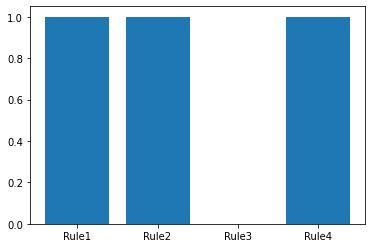

In [33]:
plt.bar(df_violated.columns,result)